In [1]:
import os
import sys
import gi

gi.require_version('NumCosmo', '1.0')
gi.require_version('NumCosmoMath', '1.0')
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

os.environ['CLMM_MODELING_BACKEND'] = 'nc'

__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import timedelta
from astropy import units
from numpy import random
plt.rcParams['text.latex.preamble'] = [r'\usepackage{pxfonts, mathpazo}']
plt.rcParams['font.family']=['Palatino']
plt.rc('text', usetex=True)


import clmm.dataops as da
import clmm.theory as theory
from clmm import Cosmology
from clmm.support import mock_data as mock
from clmm.utils import convert_units
from scipy.stats import chi2
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import binned_statistic
import corner
import math

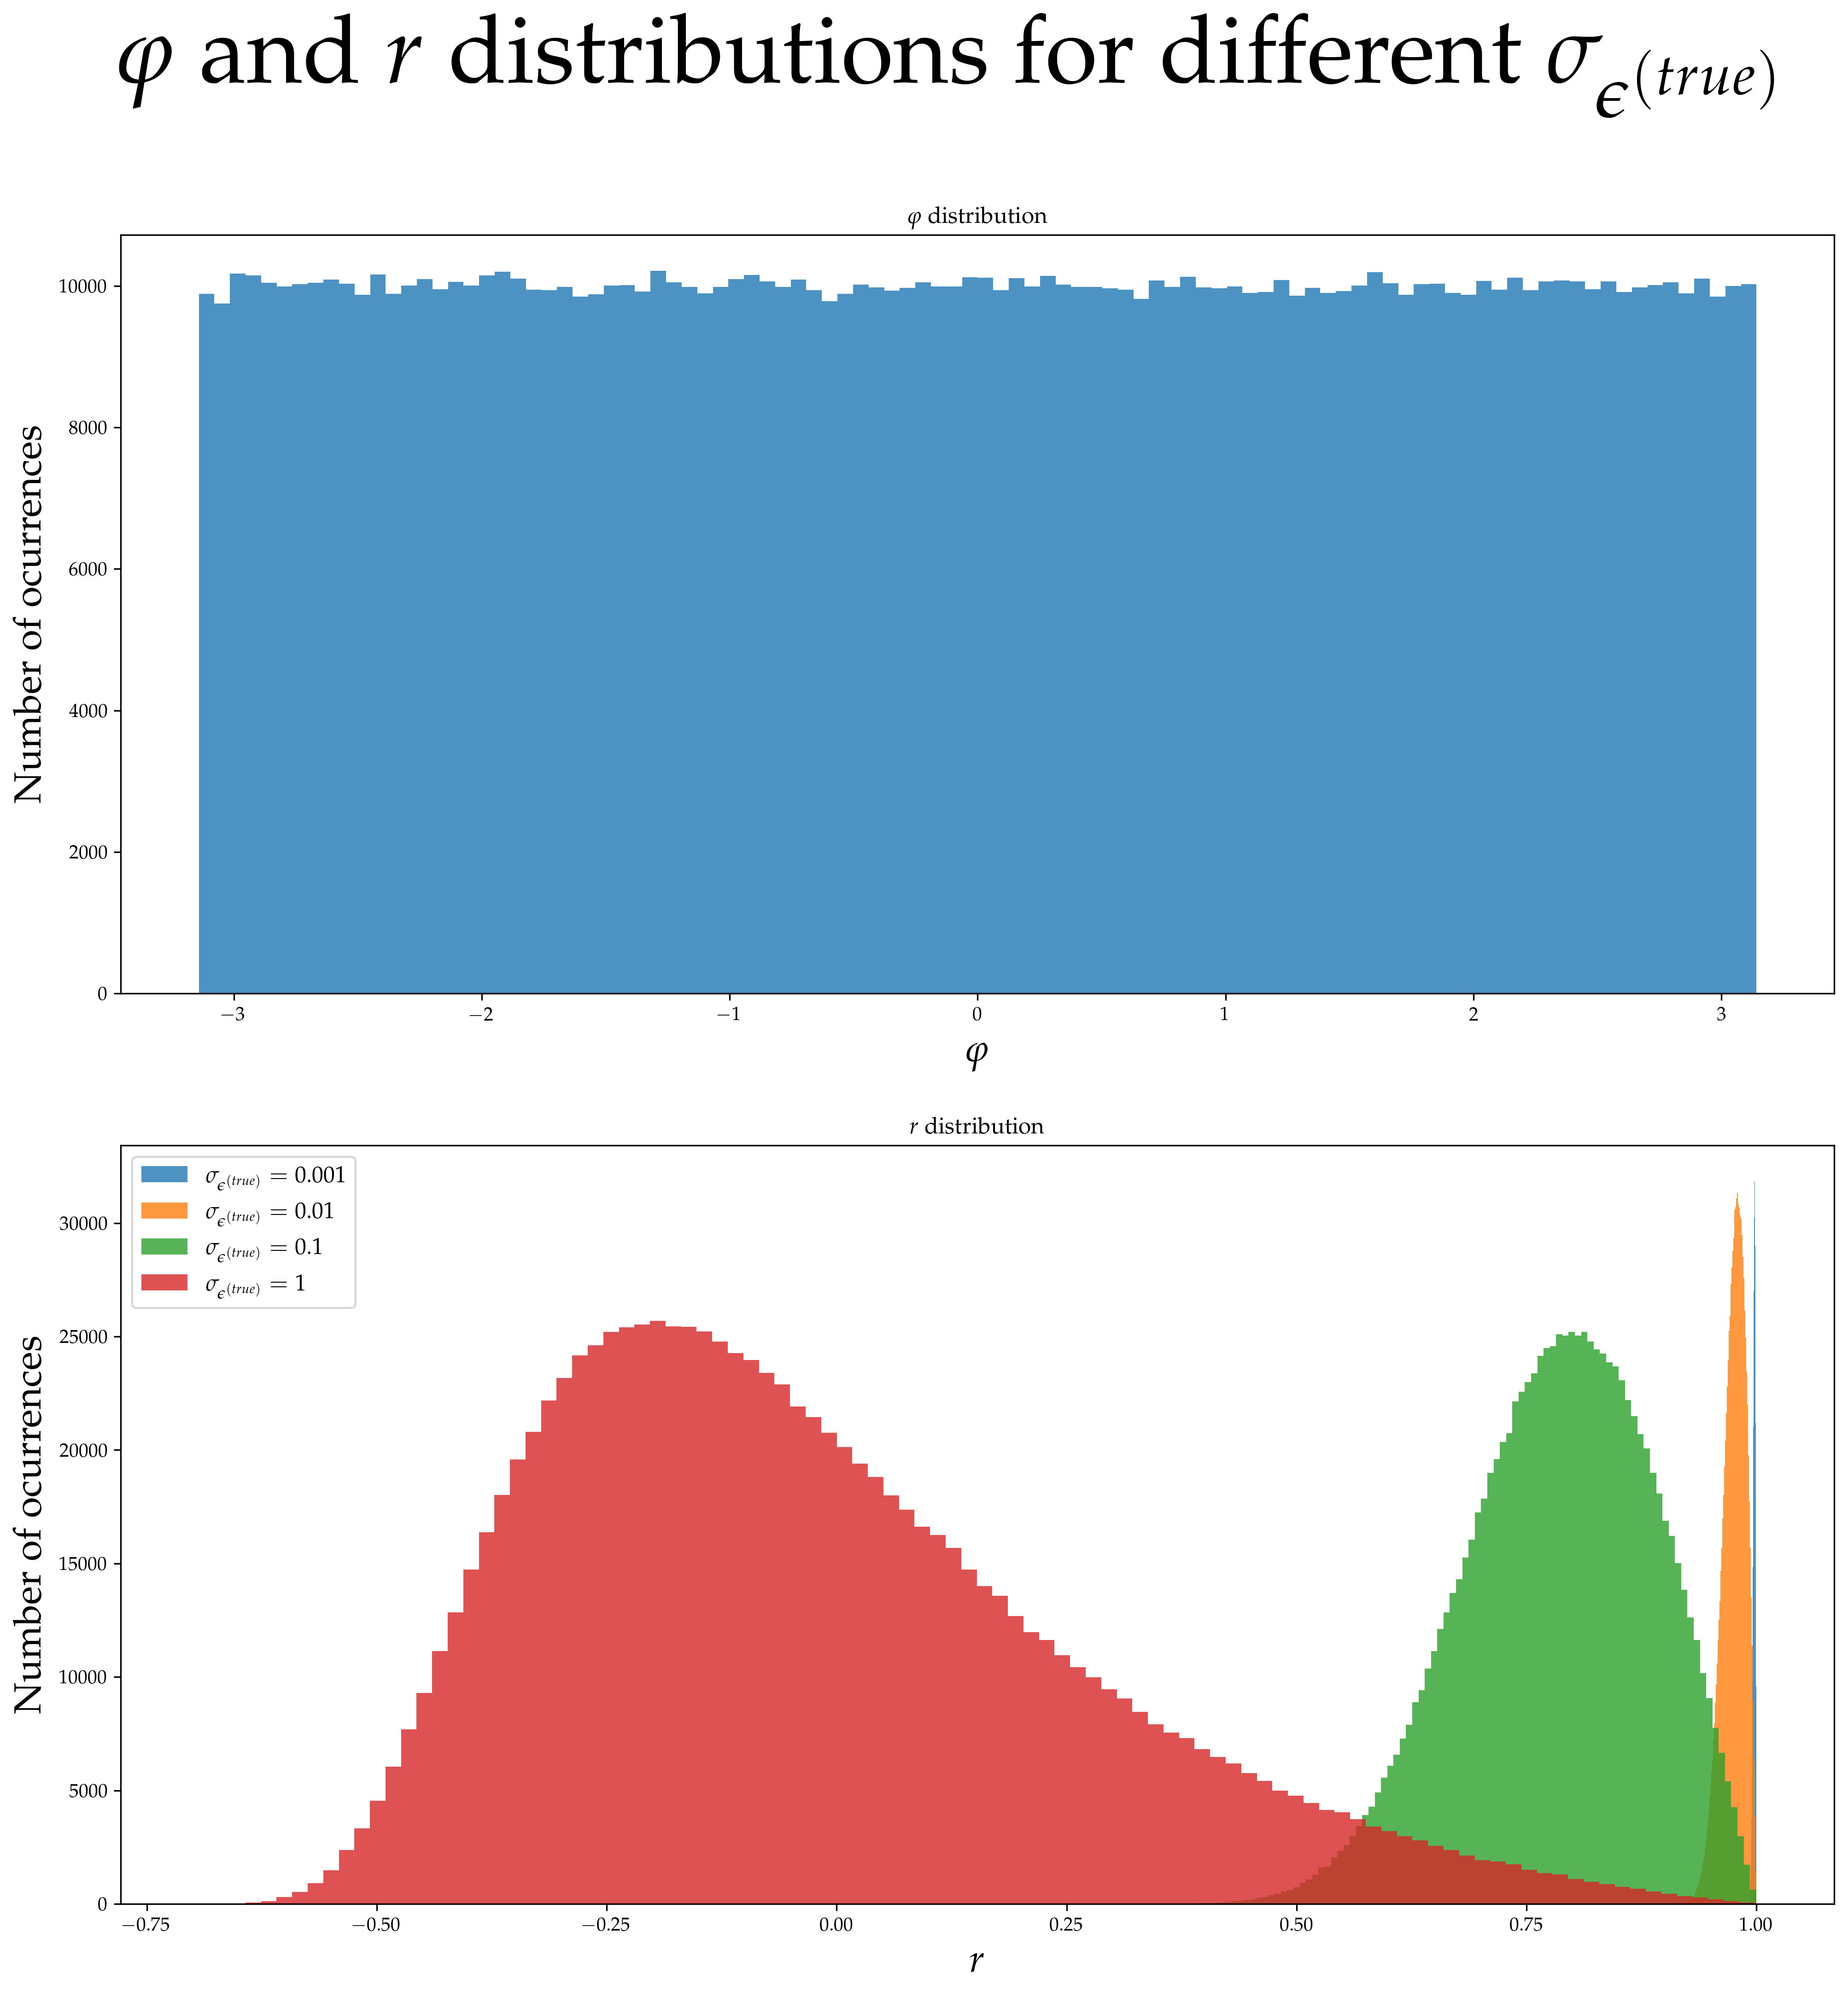

In [41]:
e_1 = random.normal(0, 1, 1000000)
e_2 = random.normal(0, 1, 1000000)

e = np.sqrt(np.add(np.power(e_1,2), np.power(e_2,2)))

theta = np.prod([np.arctan(np.divide(e_1, e_2)), 2])

r = np.divide(np.subtract(1, e), np.add(1, e))

fig, ax = plt.subplots(2, 1, figsize=(16, 16), dpi=300, facecolor="white")
# fig.tight_layout()


ax[0].hist(theta, bins=100, alpha=0.8)

for s in [1e-3, 1e-2, 1e-1, 1]:
    e_1 = random.normal(0, s, 1000000)
    e_2 = random.normal(0, s, 1000000)
    e = np.sqrt(np.add(np.power(e_1,2), np.power(e_2,2)))
    r = np.divide(np.subtract(1, e), np.add(1, e))
    ax[1].hist(r, bins=100, alpha=0.8, label=f'$\\sigma_{{\epsilon^{{(true)}}}} = {s}$')

fig.suptitle(f"$\\varphi$ and $r$ distributions for different $\\sigma_{{\epsilon^{{(true)}}}}$", fontsize=50)

ax[0].set_title(f"$\\varphi$ distribution")
ax[1].set_title(f"$r$ distribution")
ax[0].set_xlabel(f"$\\varphi$", fontsize=20)
ax[1].set_xlabel(f"$r$", fontsize=20)
ax[0].set_ylabel(f"Number of ocurrences", fontsize=20)
ax[1].set_ylabel(f"Number of ocurrences", fontsize=20)
ax[1].legend(fontsize=12)

fig.savefig("Plots/True Var/true_var_dist.png")